In [43]:
import numpy as np
from matplotlib import pyplot as plt
import numpy.random as ra

%matplotlib inline

Below is a spectrum which follows an `almost` bell-curve type distribution (anyway, the specific type of distribution is not important here). 

In [106]:
spectrum = [[1, 2, 3, 4, 5, 6],[2000, 4040, 6500, 6000, 4020, 2070]]
energies = np.array(spectrum[0])
fluxes = np.array(spectrum[1])
spectrum

[[1, 2, 3, 4, 5, 6], [2000, 4040, 6500, 6000, 4020, 2070]]

Below, first we compute probabilities of flux. Afterwards, we compute the cumulative probability.

In [107]:
prob = fluxes/float(sum(fluxes))
cum_prob = np.cumsum(prob)
cum_prob

array([ 0.08120179,  0.2452294 ,  0.5091352 ,  0.75274056,  0.91595615,  1.        ])

We draw ten thousand numbers from uniform random distribution.

In [108]:
N = 10000
R = ra.uniform(0, 1, N)
R[1:10]

array([ 0.24002432,  0.82738055,  0.64138295,  0.13625009,  0.96907282,
        0.66112759,  0.04476648,  0.13956619,  0.7258137 ])

We assign energies to events corresponding to the random number drawn.

In [109]:
gen_energies = [energies[np.argmin(np.abs(cum_prob - r))] for r in R]
gen_energies[1:10]

[2, 4, 4, 1, 6, 4, 1, 1, 4]

Histogram energies to get shape approximation.

In [110]:
gen_energies = ((np.array(gen_energies) - 1) / 1).astype(int)
times = np.arange(1, 6, 1)
lc = np.bincount(gen_energies, minlength=len(times))
lc

array([1602, 2179, 2503, 2041, 1247,  428], dtype=int64)

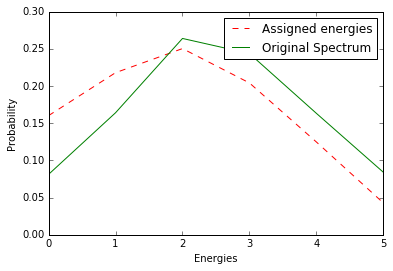

In [111]:
plot1, = plt.plot(lc/float(sum(lc)), 'r--', label='Assigned energies')
plot2, = plt.plot(prob,'g',label='Original Spectrum')
plt.xlabel('Energies')
plt.ylabel('Probability')
plt.legend(handles=[plot1,plot2])
plt.show()